In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from data_analysis_utils import summarise_datasets, do_ttest, collate_results

figsize = (12, 6)

# Load in calibration results from .csv files

In [3]:
calib_data = {}

path = './results'
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]

for csv in csv_files:
    file = os.path.join(path, csv)
    data_name = csv.split('.')[0]
    calib_data[data_name] = pd.read_csv(file, index_col = 0)
    
os.listdir(path)

['charuco_freehand.csv',
 'charuco_rig.csv',
 'dots_freehand.csv',
 'dots_rig.csv',
 'precalib']

In [4]:
SIZE = 18
plt.rc('axes', titlesize=SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SIZE)    # fontsize of the tick labels
plt.rc('figure', titlesize=SIZE)  # fontsize of the figure title

# Calibration and evaluation on same datasets

## Summary statistics

,Reproj.,Recon.,Tracked Reproj.,Tracked Recon.,Mean Frame Grab Time,Mean Calibration Time
charuco_rig,0.944777,1.363656,1.073905,1.365135,1.309425,15.517809
dots_rig,1.204787,0.921150,1.353985,0.928704,0.942623,9.795939
charuco_freehand,1.450244,1.893063,3.654756,3.055658,1.322061,30.057087
dots_freehand,1.835267,2.779876,3.173015,2.857304,1.033029,30.133889


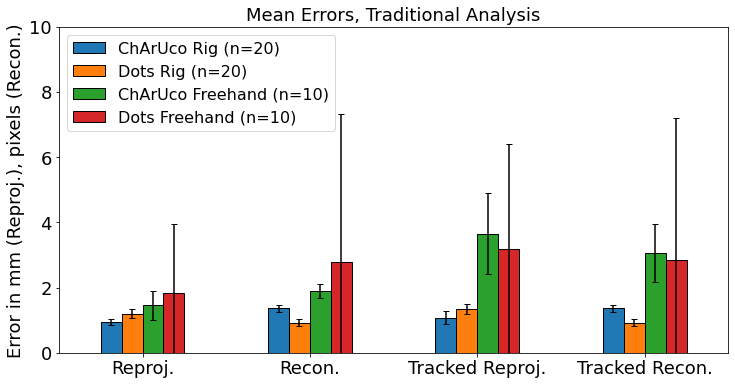

In [5]:
means, stds = summarise_datasets(calib_data, ["charuco_rig", "dots_rig", "charuco_freehand", "dots_freehand"])
columns_to_plot = ["Reproj.", "Recon.", "Tracked Reproj.", "Tracked Recon."]

labels = ["Reproj.", "Recon.", "Tracked Reproj.", "Tracked Recon."]

fig1 = plt.figure(figsize=(figsize))
ax1 = fig1.add_subplot(1, 1, 1)

means[columns_to_plot].transpose().plot.bar(title="Mean Errors, Traditional Analysis",
                                            ax=ax1,
                                            yerr=stds.transpose(),
                                            ecolor='black',
                                            capsize=3,
                                            rot=0,
                                            legend=None,
                                            ylabel="Error in mm (Reproj.), pixels (Recon.)",
                                           edgecolor=["black"])
ax1.set_ylim(0, 10)

n_charuco_rig = len(calib_data["charuco_rig"])
n_dots_rig = len(calib_data["dots_rig"])
n_charuco_freehand = len(calib_data["charuco_freehand"])
n_dots_freehand = len(calib_data["dots_freehand"])

L = ax1.legend(prop={'size': 16})
legend = [f"ChArUco Rig (n={n_charuco_rig})", f"Dots Rig (n={n_dots_rig})", f"ChArUco Freehand (n={n_charuco_freehand})", f"Dots Freehand (n={n_dots_freehand})"]
L.get_texts()[0].set_text(legend[0])
L.get_texts()[1].set_text(legend[1])
L.get_texts()[2].set_text(legend[2])
L.get_texts()[3].set_text(legend[3])

plt.savefig('plots/charuco_vs_dots_vs_freehand_mean.png', dpi=600)

means



In [6]:
means

,Reproj.,Recon.,Tracked Reproj.,Tracked Recon.,Mean Frame Grab Time,Mean Calibration Time
charuco_rig,0.944777,1.363656,1.073905,1.365135,1.309425,15.517809
dots_rig,1.204787,0.921150,1.353985,0.928704,0.942623,9.795939
charuco_freehand,1.450244,1.893063,3.654756,3.055658,1.322061,30.057087
dots_freehand,1.835267,2.779876,3.173015,2.857304,1.033029,30.133889


In [7]:
stds

,Reproj.,Recon.,Tracked Reproj.,Tracked Recon.,Mean Frame Grab Time,Mean Calibration Time
charuco_rig,0.079805,0.115014,0.197782,0.115315,0.059093,6.941421
dots_rig,0.128212,0.101223,0.156896,0.103366,0.058443,2.478851
charuco_freehand,0.434794,0.223273,1.251073,0.878488,0.280649,15.124466
dots_freehand,2.111298,4.542091,3.235573,4.343708,0.128403,7.151062


## Freehand vs Rig ttest

In [45]:
t_test_vals = do_ttest(calib_data, "dots_freehand", "dots_rig")

Reprojection p-value: 0.3699948550565948
Reconstruction p-value: 0.22789576879181278
Tracked Reprojection p-value: 0.109252069018247
Tracked Reconstruction p-value: 0.19389779304394966
Mean Calibration Time p-value: 5.0670245976510966e-06


## Charuco vs Dots ttest

In [9]:
t_test_vals = do_ttest(calib_data, "charuco_rig", "dots_rig")

Reprojection p-value: 9.27435542486081e-09
Reconstruction p-value: 2.3345561731264645e-15
Tracked Reprojection p-value: 1.676298816770034e-05
Tracked Reconstruction p-value: 4.615780069561303e-15
Mean Calibration Time p-value: 0.0019958041923101616


# Calibrate on one data set, evaluate on the remaining ones
'Standard' approaches to calibration involve calbirating and evaluating on the same datasets, which will return favourable results, when compared to evaluating on a different set of data.

Instead iterate through all datasets and use 1 for calibration, and then evaluate on the rest.

This will results in n sets of results, where n is the total number of calibration data sets collected.

In [10]:
dots_folder = 'results/precalib/dots_rig'
charuco_folder = 'results/precalib/charuco_rig'
charuco_freehand_folder = 'results/precalib/charuco_freehand'
dots_freehand_folder = 'results/precalib/dots_freehand'

precalib_data = {}
threshold = 1000

precalib_data["dots_rig"] = collate_results(dots_folder, threshold=threshold)
precalib_data["charuco_rig"] = collate_results(charuco_folder, threshold=threshold)
precalib_data["charuco_freehand"] = collate_results(charuco_freehand_folder, threshold=threshold)
precalib_data["dots_freehand"] = collate_results(dots_freehand_folder, threshold=threshold)



Processing results/precalib/dots_rig
Processing results/precalib/charuco_rig
Processing results/precalib/charuco_freehand
Processing results/precalib/dots_freehand


## Summary Statistics

Mean Values


,Reproj.,Recon.,Tracked Reproj.,Tracked Recon.,Mean Frame Grab Time,Mean Calibration Time
charuco_rig,1.078850,1.672023,1.183000,1.673288,1.347100,1.320425
dots_rig,1.605508,1.443878,1.777692,1.448706,0.952583,2.369233
charuco_freehand,2.047494,4.520967,3.478724,4.991561,1.369226,1.753600
dots_freehand,14.563183,9.922715,16.615240,10.090930,1.114629,1.978957


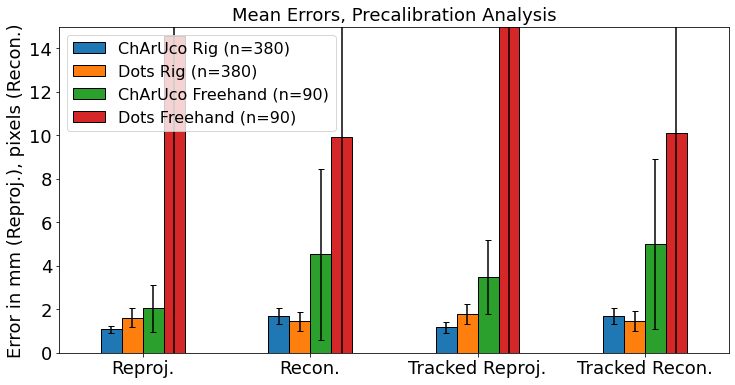

In [11]:
precalib_means, precalib_stds = summarise_datasets(precalib_data, ["charuco_rig", "dots_rig", "charuco_freehand", "dots_freehand"])

columns_to_plot = ["Reproj.", "Recon.", "Tracked Reproj.", "Tracked Recon."]

labels = ["Reproj.", "Recon.", "Tracked Reproj.", "Tracked Recon."]

fig1 = plt.figure(figsize=(figsize))
ax1 = fig1.add_subplot(1, 1, 1)

precalib_means[columns_to_plot].transpose().plot.bar(title="Mean Errors, Precalibration Analysis",
                                                     ax=ax1,
                                                     yerr=precalib_stds[columns_to_plot].transpose(),
                                                     ecolor='black',
                                                     capsize=3,
                                                     rot=0,
                                                     legend=None,
                                                     ylabel="Error in mm (Reproj.), pixels (Recon.)",
                                                    edgecolor=["black"])
ax1.set_ylim(0, 15)

n_charuco_rig = len(precalib_data["charuco_rig"])
n_dots_rig = len(precalib_data["dots_rig"])
n_charuco_freehand = len(precalib_data["charuco_freehand"])
n_dots_freehand = len(precalib_data["dots_freehand"])

L = ax1.legend(prop={'size': 16}, loc='upper left')
legend = [f"ChArUco Rig (n={n_charuco_rig})", f"Dots Rig (n={n_dots_rig})", f"ChArUco Freehand (n={n_charuco_freehand})", f"Dots Freehand (n={n_dots_freehand})"]
L.get_texts()[0].set_text(legend[0])
L.get_texts()[1].set_text(legend[1])
L.get_texts()[2].set_text(legend[2])
L.get_texts()[3].set_text(legend[3])


plt.savefig('plots/_precalib_charuco_vs_dots_vs_freehand_mean.png', dpi=600)

print("Mean Values")
precalib_means

In [12]:
stds

,Reproj.,Recon.,Tracked Reproj.,Tracked Recon.,Mean Frame Grab Time,Mean Calibration Time
charuco_rig,0.079805,0.115014,0.197782,0.115315,0.059093,6.941421
dots_rig,0.128212,0.101223,0.156896,0.103366,0.058443,2.478851
charuco_freehand,0.434794,0.223273,1.251073,0.878488,0.280649,15.124466
dots_freehand,2.111298,4.542091,3.235573,4.343708,0.128403,7.151062


In [13]:
precalib_stds[columns_to_plot].transpose()

,charuco_rig,dots_rig,charuco_freehand,dots_freehand
Reproj.,0.167765,0.439053,1.078454,36.019055
Recon.,0.369086,0.454967,3.940450,14.599854
Tracked Reproj.,0.253034,0.468270,1.704630,43.202983
Tracked Recon.,0.369530,0.454880,3.919854,15.073915


## Freehand vs rig ttest

In [16]:
t_test_vals = do_ttest(precalib_data, "dots_rig", "dots_freehand")

Reprojection p-value: 0.0009695088149761289
Reconstruction p-value: 3.4648099678694737e-07
Tracked Reprojection p-value: 0.0015887505564389883
Tracked Reconstruction p-value: 4.6640903704717334e-07
Mean Calibration Time p-value: 0.0008469878468014881


## Charuco vs dots ttest

In [17]:
t_test_vals = do_ttest(precalib_data, "dots_rig", "charuco_rig")

Reprojection p-value: 2.9730343967866074e-74
Reconstruction p-value: 9.730580415006255e-14
Tracked Reprojection p-value: 2.1098992534040138e-77
Tracked Reconstruction p-value: 2.3021697904649584e-13
Mean Calibration Time p-value: 1.8288442565932075e-69


## Compare errors from the two analysis  methods

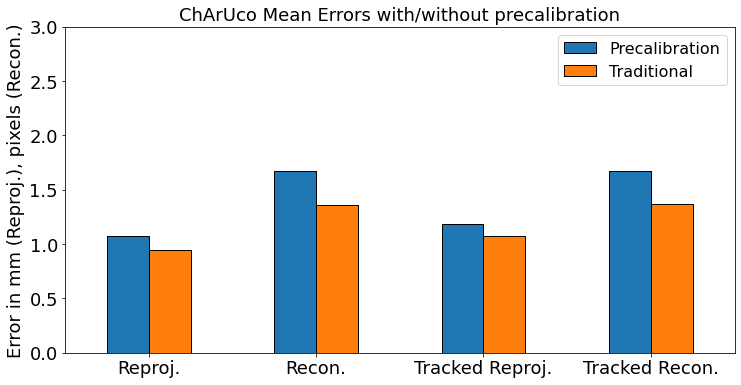

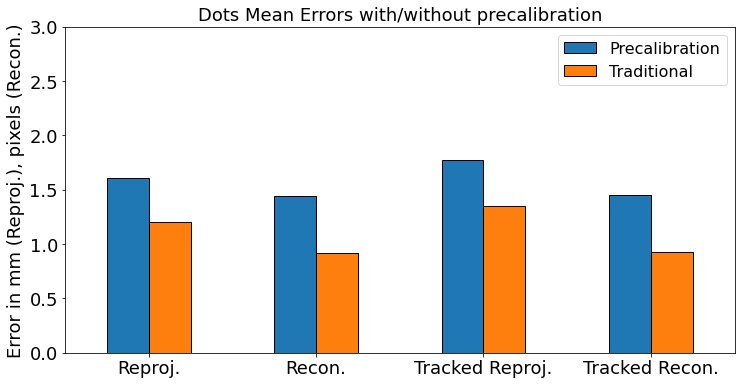

In [15]:
columns_to_plot = ["Reproj.", "Recon.", "Tracked Reproj.", "Tracked Recon."]
labels = ["Reproj.", "Recon.", "Tracked Reproj.", "Tracked Recon."]

charuco = pd.DataFrame()
dots = pd.DataFrame()

# Move the data into a format that can be plotted as desired
charuco["With_precalib"] = precalib_means.transpose()["charuco_rig"]
charuco["Without_precalib"] = means.transpose()["charuco_rig"]
dots["With_precalib"] = precalib_means.transpose()["dots_rig"]
dots["Without_precalib"] = means.transpose()["dots_rig"]

charuco = charuco.transpose()
dots = dots.transpose()

# Plot Charuco
fig1 = plt.figure(figsize=(figsize))
ax1 = fig1.add_subplot(1, 1, 1)

charuco[columns_to_plot].transpose().plot.bar(title="ChArUco Mean Errors with/without precalibration",
                                                        ax=ax1,
                                                        legend=None,
                                                        ylabel="Error in mm (Reproj.), pixels (Recon.)",
                                                        rot=0,
                                                         edgecolor=["black"])
ax1.set_ylim(0, 3)

L = ax1.legend(prop={'size': 16})
legend = [f"Precalibration", f"Traditional"]
L.get_texts()[0].set_text(legend[0])
L.get_texts()[1].set_text(legend[1])

plt.savefig('plots/charuco_precalib_vs_no_precalib.png', dpi=600)

# Plot dots
fig1 = plt.figure(figsize=(figsize))
ax1 = fig1.add_subplot(1, 1, 1)

dots[columns_to_plot].transpose().plot.bar(title="Dots Mean Errors with/without precalibration",
                                                        ax=ax1,
                                                        legend=None,
                                                       rot=0,
                                                        ylabel="Error in mm (Reproj.), pixels (Recon.)",
                                                      edgecolor=["black"])
ax1.set_ylim(0, 3)

L = ax1.legend(prop={'size': 16})
legend = [f"Precalibration", f"Traditional"]
L.get_texts()[0].set_text(legend[0])
L.get_texts()[1].set_text(legend[1])

plt.savefig('plots/Dots_precalib_vs_no_precalib.png', dpi=600)

# Different number of samples

In [47]:
dots_rig_10_folder = 'results_diff_n/dots_rig_10'
dots_rig_5_folder = 'results_diff_n/dots_rig_5'
dots_rig_3_folder = 'results_diff_n/dots_rig_3'


diff_n_data = {}
threshold = 1000

diff_n_data["10"] = collate_results(dots_rig_10_folder, threshold=threshold)
diff_n_data["5"] = collate_results(dots_rig_5_folder, threshold=threshold)
diff_n_data["3"] = collate_results(dots_rig_3_folder, threshold=threshold)


Processing results_diff_n/dots_rig_10
Processing results_diff_n/dots_rig_5
Processing results_diff_n/dots_rig_3


,Reproj.,Recon.,Tracked Reproj.,Tracked Recon.,Mean Frame Grab Time,Mean Calibration Time
15_57_13,1.397531,1.094769,1.478487,1.102754,0.982440,13.394999
15_58_14,1.372075,1.161368,1.540830,1.177575,0.963948,10.746165
15_59_11,1.550059,1.378683,1.732694,1.421431,0.901973,11.186948
15_59_52,1.385915,1.082992,1.586555,1.083629,0.895087,7.633077
16_00_38,1.481266,1.145634,1.585814,1.150073,0.902732,7.090525
...,...,...,...,...,...,...
16_11_21,1.205701,1.336083,1.318981,1.350099,0.908573,9.996792
16_12_00,1.498351,1.344565,1.629092,1.352468,0.873867,7.662481
16_12_49,1.668500,1.272090,1.786314,1.293742,0.797339,8.250273
16_13_39,1.384089,1.164809,1.567955,1.176358,0.811529,9.172129


Mean Values


,Reproj.,Recon.,Tracked Reproj.,Tracked Recon.,Mean Frame Grab Time,Mean Calibration Time
10,1.475971,1.373476,1.637744,1.378562,0.866719,9.165425
5,1.605508,1.443878,1.777692,1.448706,0.952583,2.369233
3,2.005864,1.599952,2.323618,1.630561,0.997648,0.955073


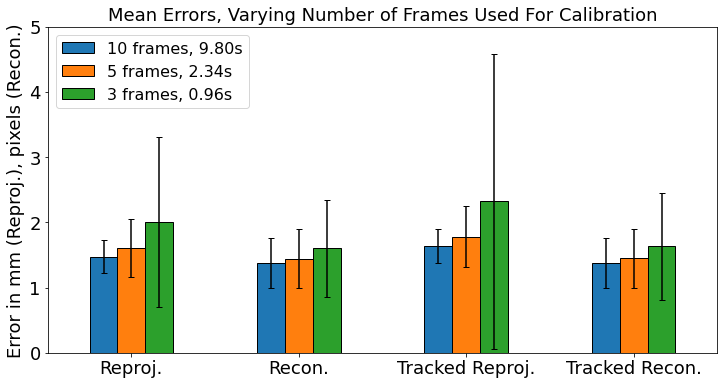

In [38]:
precalib_means, precalib_stds = summarise_datasets(diff_n_data, ["10", "5", "3"])

columns_to_plot = ["Reproj.", "Recon.", "Tracked Reproj.", "Tracked Recon."]

labels = ["Reproj.", "Recon.", "Tracked Reproj.", "Tracked Recon."]

fig1 = plt.figure(figsize=(figsize))
ax1 = fig1.add_subplot(1, 1, 1)

precalib_means[columns_to_plot].transpose().plot.bar(title="Mean Errors, Varying Number of Frames Used For Calibration",
                                                     ax=ax1,
                                                     yerr=precalib_stds[columns_to_plot].transpose(),
                                                     ecolor='black',
                                                     capsize=3,
                                                     rot=0,
                                                     legend=None,
                                                     ylabel="Error in mm (Reproj.), pixels (Recon.)",
                                                    edgecolor=["black"])
ax1.set_ylim(0, 5)

# n_charuco_rig = len(precalib_data["charuco_rig"])
# n_dots_rig = len(precalib_data["dots_rig"])
# n_charuco_freehand = len(precalib_data["charuco_freehand"])
# n_dots_freehand = len(precalib_data["dots_freehand"])

L = ax1.legend(prop={'size': 16}, loc='upper left')
legend = [f"10 frames, 9.80s", "5 frames, 2.34s", "3 frames, 0.96s"]
L.get_texts()[0].set_text(legend[0])
L.get_texts()[1].set_text(legend[1])
L.get_texts()[2].set_text(legend[2])



plt.savefig('plots/precalib_dots_different_n.png', dpi=600)

print("Mean Values")
precalib_means

# Additional t-tests

In [50]:
from scipy.stats import ttest_ind

for data_type in ["charuco_rig", "dots_rig"]:
    for i in ["Reproj.", "Recon.", "Tracked Reproj.", "Tracked Recon."]:
        calib = calib_data[data_type][i]
        precalib = precalib_data[data_type][i]

        ttest = ttest_ind(calib, precalib, equal_var=False)
        print(f"{data_type} {i} p-value: {ttest.pvalue}")

print("10 vs 3 frames")
for i in ["Reproj.", "Recon.", "Tracked Reproj.", "Tracked Recon.", "Mean Calibration Time"]:
    ten = diff_n_data["10"][i]
    three = diff_n_data["3"][i]
    ttest = ttest_ind(ten, three, equal_var=False)
    print(f"{i} p-value: {ttest.pvalue}")


charuco_rig Reproj. p-value: 2.0650472442732718e-07
charuco_rig Recon. p-value: 1.720787764716614e-12
charuco_rig Tracked Reproj. p-value: 0.026977109460713366
charuco_rig Tracked Recon. p-value: 1.911689123939269e-12
dots_rig Reproj. p-value: 8.502587307058538e-15
dots_rig Recon. p-value: 2.971293801125478e-26
dots_rig Tracked Reproj. p-value: 1.839196059106339e-12
dots_rig Tracked Recon. p-value: 2.0683279255113106e-25
10 vs 3 frames
Reproj. p-value: 7.179388770319227e-14
Recon. p-value: 2.2437492511647226e-07
Tracked Reproj. p-value: 1.1810084397219393e-08
Tracked Recon. p-value: 1.0521748804314073e-07
Mean Calibration Time p-value: 1.1956292996827266e-249


In [ ]:
    label1_data = all_data[label1]
    label2_data = all_data[label2]

    cat1 = label1_data["Reproj."]
    cat2 = label2_data["Reproj."]
    reproj = ttest_ind(cat1, cat2, equal_var=False)
          
    cat1 = label1_data["Recon."]
    cat2 = label2_data["Recon."]
    recon = ttest_ind(cat1, cat2, equal_var=False)
    
    cat1 = label1_data["Tracked Reproj."]
    cat2 = label2_data["Tracked Reproj."]
    tracked_reproj = ttest_ind(cat1, cat2, equal_var=False)
    
    cat1 = label1_data["Tracked Recon."]
    cat2 = label2_data["Tracked Recon."]
    tracked_recon = ttest_ind(cat1, cat2, equal_var=False)
    
    cat1 = label1_data["Mean Calibration Time"]
    cat2 = label2_data["Mean Calibration Time"]
    calib_time = ttest_ind(cat1, cat2, equal_var=False)